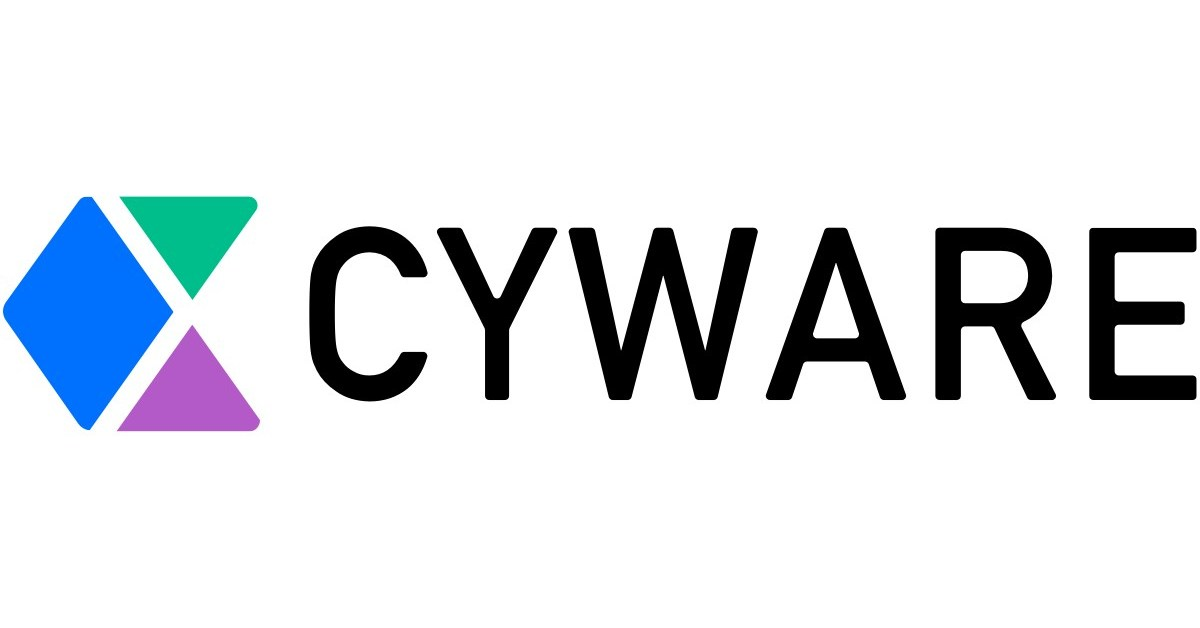

# CYTAXII2, Cyware's TAXII 2.x Client

cytaxii2 is a pip library [for python 3] by Cyware that can be used to connect to and, discover, get collections, poll and inbox data from and to a TAXII 2.x server. This supports stix/taxii 2, 2.1

This library supports python3 and can be installed by "pip3 install cytaxii2". After installation the library can be imported as follows:

In [ ]:
from cytaxii2 import cytaxii2

After importing, we have to create an object with the TAXII URL, username and password and TAXII version [2.0/ 2.1], as follows:

In [ ]:
cytaxii_object = cytaxii2.cytaxii2(discovery_url='taxii_discovery_url',
             username='taxii_user_name',
             password='taxii_password',
             version=2.1)

After the object is created we can call the methods present in the library. Each of the methods are highlighted below. 

The first method is where we can perform a TAXII discovery request and can be done as follows. 

##### Arguments
None

In [ ]:
discovery_response = cytaxii_object.discovery_request()

Next, we can also perform a root discovery, where we get information about the root server and can be done as follows. 

##### Arguments
None

In [ ]:
root_discovery_response = cytaxii_object.root_discovery()

Next, we can perform a collection request, where we request all STIX data collections from the TAXII server. We must note in TAXII all data is held inside a collection and a list of collections can be requested as follows.

##### Arguments
None

In [ ]:
collections = cytaxii_object.collection_request()

Next, we can also get data about a particular TAXII collection URL and this can be done as follow. 

##### Arguments:
- collection_id: Enter the collection ID to get details of __[mandatory]__

In [ ]:
collection_data = cytaxii_object.collection_data_request(collection_id="34e7e24a-1bad-48f1-b88d-bdfd5f99a6bd")

Next, we can get data from a TAXII collection. This is one of the most important use cases, where we can poll data from a TAXII server.

##### Arguments:
- collection_id: Enter the collection ID to get details of __[mandatory]__
- added_after: Enter a datetime string to parse. Data will be returned only after this date till current data. Defaults to all data
- limit: Enter the number of responses to return 
- object_id: Enter the object_id. This param will limit the response to only this object in the response
- object_type: Enter the object type to return
- next: If the data is paginated, the "next" param can be used to get additional data


In [ ]:
poll_response = cytaxii_object.poll_request(collection_id='34e7e24a-1bad-48f1-b88d-bdfd5f99a6bd', added_after=None, limit=None, object_id=None, next=None, object_type=None)

Next, we can also send data AKA inbox STIX data to the TAXII server. To do this, we define the STIX package to send as seen below. We must note that we must send only valid json and STIX data which is respective to the TAXII server

In [ ]:
stix_json = """
{
        "objects": [
            {
                "id": "identity--a9e5f832-3bd2-41bb-b543-05341539c223",
                "identity_class": "organization",
                "lang": "en",
                "name": "CTIX",
                "type": "identity",
                "spec_version": "2.1",
                "created": "2021-06-02T05:58:46.325759Z",
                "modified": "2021-06-02T05:58:46.325759Z"
            },
            {
                "id": "marking-definition--f88d31f6-486f-44da-b317-01333bde0b82",
                "created": "2017-01-20T00:00:00.000Z",
                "definition_type": "tlp",
                "name": "TLP:AMBER",
                "definition": {
                    "tlp": "amber"
                },
                "type": "marking-definition",
                "spec_version": "2.1"
            },
            {
                "id": "marking-definition--34098fce-860f-48ae-8e50-ebd3cc5e41da",
                "created": "2017-01-20T00:00:00.000Z",
                "definition_type": "tlp",
                "name": "TLP:GREEN",
                "definition": {
                    "tlp": "green"
                },
                "type": "marking-definition",
                "spec_version": "2.1"
            }
        ],
        "more": true,
        "next": "2"
    }
"""

Lastly, we can inbox [send] the above defined STIX data to the TAXII server using the inbox request as seen below. 

##### Arguments 
- collection_id: Enter the collection ID to get details of __[mandatory]__
- stix_bundle: Enter the STIX bundle to send to the TAXII server

In [ ]:
inbox_response = cytaxii_object.inbox_request(collection_id="a3ca32aa-5441-423e-a6e9-a28f949e011b", stix_bundle=stix_json)

The responses can be viewed by printing the response below. We must note that the data returned is pure JSON with a structure like the follows:

{
    response: response_json,
    status: request_status [True/ False],
    status_code: response_status_code
}


In [ ]:
print(inbox_response)